Step 1 - Import python libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns
import scipy
import pandas.util.testing as tm
from scipy import stats

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import sys


Step 2 - Load and read the data file
1.   Upload data file from Google drive and run the notebook in the cloud
2.   Upload data file from local computer and run the notebook in the cloud
3.   Load data file from local computer and run the notebook locally

Step 2 - Option 1 - Upload data file from Google drive

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#change the file name ("complete_COVID_samples.tsv") to your file name to load the data
df=pd.read_table('/content/drive/MyDrive/complete_COVID_samples.tsv',low_memory=False)
df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (13,14,16,20) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,sample,frequency,templates,amino_acid,rearrangement,v_resolved,d_resolved,j_resolved,age,gender,smoker,icu_admit,birth_year,blood_type,cmv_at_donation,days_from_last_symptom_to_sample,ethnicity,height_meters,hospitalized,weight_kg,race
0,6232BW_TCRB,0.006751,3636,CASSLGLAGPGFF,ACGATCCAGCGCACAGAGCAGGAGGACTCGGCCGTGTATCTCTGTG...,TCRBV07-02,TCRBD02-01*02,TCRBJ02-01*01,72,Male,False,False,1948,ab neg,NEG,26.0,not hispanic/latino,1.778,True,95.24,Caucasian
1,6232BW_TCRB,0.005639,3037,CASRVGSSYNEQFF,ATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCA...,TCRBV12,TCRBD02-01*02,TCRBJ02-01*01,72,Male,False,False,1948,ab neg,NEG,26.0,not hispanic/latino,1.778,True,95.24,Caucasian
2,6232BW_TCRB,0.004258,2293,CASNPYRVNTGELFF,GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...,TCRBV27-01*01,TCRBD02-01*02,TCRBJ02-02*01,72,Male,False,False,1948,ab neg,NEG,26.0,not hispanic/latino,1.778,True,95.24,Caucasian
3,6232BW_TCRB,0.003639,1960,CASSALRSSYNEQFF,CAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCAGCT...,TCRBV12,unknown,TCRBJ02-01*01,72,Male,False,False,1948,ab neg,NEG,26.0,not hispanic/latino,1.778,True,95.24,Caucasian
4,6232BW_TCRB,0.003521,1896,CASSFEDEGGETQYF,AACGCCTTGTTGCTGGGGGACTCGGCCCTCTATCTCTGTGCCAGCA...,TCRBV05-06*01,unknown,TCRBJ02-05*01,72,Male,False,False,1948,ab neg,NEG,26.0,not hispanic/latino,1.778,True,95.24,Caucasian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15061643,1566265BW_TCRB,0.000001,1,CSVEDLRGGYTF,CTGACTGTGAGCAACATGAGCCCTGAAGACAGCAGCATATATCTCT...,TCRBV29-01,unknown,TCRBJ01-02*01,33,Female,False,False,1987,NaN,NaN,51.0,not hispanic/latino,1.676,False,72.56,Caucasian
15061644,1566265BW_TCRB,0.000001,1,CASGRRGDYGYTF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,unknown,TCRBJ01-02*01,33,Female,False,False,1987,NaN,NaN,51.0,not hispanic/latino,1.676,False,72.56,Caucasian
15061645,1566265BW_TCRB,0.000001,1,CASSWTGNSPLHF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,TCRBD02-01,TCRBJ01-06*02,33,Female,False,False,1987,NaN,NaN,51.0,not hispanic/latino,1.676,False,72.56,Caucasian
15061646,1566265BW_TCRB,0.000001,1,CASSLDWTEYYEQYF,CAGCCTGCAAAGCTTGAGGACTCGGCCGTGTATCTCTGTGCCAGCA...,TCRBV11-02*01,TCRBD01-01*01,TCRBJ02-07*01,33,Female,False,False,1987,NaN,NaN,51.0,not hispanic/latino,1.676,False,72.56,Caucasian


Step 2 - Option 2 - Upload data file from local computer

In [ ]:
from google.colab import files 
uploaded = files.upload()

In [ ]:
import io

#change the file name ("complete_COVID_samples.tsv") to your file name to load the data
df = pd.read_table(io.BytesIO(uploaded['complete_COVID_samples.tsv']), sep = '\t')
df

Step 2 - Option 3 - Run the notebook locally (refer here for how to connect to local runtime https://research.google.com/colaboratory/local-runtimes.html)

In [ ]:
#change the file name ("complete_COVID_samples.tsv") to your file name to load the data
df = pd.read_table('downloads/covid_data/complete_COVID_samples.tsv', sep = '\t')
df

Step 3 - Create the standardized format (column content and column names)
1.   Sample name (sample)
2.   Clone frequency (freq)
3.   Clone reads count (#count)
4.   CDR3 amino acid clonotype (cdr3aa)
5.   CDR3 nucleotide (cdr3nt)
6.   V gene (v)
7.   D gene (d)
8.   J gene (j)
9.   Optional - Sample feature (here we use hospitalization as the clinical feature)

In [ ]:
#select the columns that are listed above
df = df[['sample','frequency', 'templates', 'amino_acid', 'rearrangement', 'v_resolved', 'd_resolved','j_resolved','hospitalized']]
#rename the columns 
df.columns = ['sample', 'freq' , '#count' , 'cdr3aa' , 'cdr3nt' , 'v' , 'd' , 'j' , 'hospitalization']
df

,sample,freq,#count,cdr3aa,cdr3nt,v,d,j,hospitalization
0,6232BW_TCRB,0.006751,3636,CASSLGLAGPGFF,ACGATCCAGCGCACAGAGCAGGAGGACTCGGCCGTGTATCTCTGTG...,TCRBV07-02,TCRBD02-01*02,TCRBJ02-01*01,True
1,6232BW_TCRB,0.005639,3037,CASRVGSSYNEQFF,ATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCA...,TCRBV12,TCRBD02-01*02,TCRBJ02-01*01,True
2,6232BW_TCRB,0.004258,2293,CASNPYRVNTGELFF,GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...,TCRBV27-01*01,TCRBD02-01*02,TCRBJ02-02*01,True
3,6232BW_TCRB,0.003639,1960,CASSALRSSYNEQFF,CAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCAGCT...,TCRBV12,unknown,TCRBJ02-01*01,True
4,6232BW_TCRB,0.003521,1896,CASSFEDEGGETQYF,AACGCCTTGTTGCTGGGGGACTCGGCCCTCTATCTCTGTGCCAGCA...,TCRBV05-06*01,unknown,TCRBJ02-05*01,True
...,...,...,...,...,...,...,...,...,...
15061643,1566265BW_TCRB,0.000001,1,CSVEDLRGGYTF,CTGACTGTGAGCAACATGAGCCCTGAAGACAGCAGCATATATCTCT...,TCRBV29-01,unknown,TCRBJ01-02*01,False
15061644,1566265BW_TCRB,0.000001,1,CASGRRGDYGYTF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,unknown,TCRBJ01-02*01,False
15061645,1566265BW_TCRB,0.000001,1,CASSWTGNSPLHF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,TCRBD02-01,TCRBJ01-06*02,False
15061646,1566265BW_TCRB,0.000001,1,CASSLDWTEYYEQYF,CAGCCTGCAAAGCTTGAGGACTCGGCCGTGTATCTCTGTGCCAGCA...,TCRBV11-02*01,TCRBD01-01*01,TCRBJ02-07*01,False


Basic analysis 1 - Reads count

In [ ]:
df_count = df.groupby(['sample','hospitalization']).agg({'#count':'sum'}).reset_index().rename(columns={'#count':"reads_count"})

Basic analysis 2 - Clonotype count

In [ ]:
df_diversity = df.groupby(['sample','hospitalization'], sort=False).size().reset_index(name='clonotype_count')

Basic analysis 3 - Mean frequency

In [ ]:
df_mean_frequency = df.groupby(['sample','hospitalization']).agg({'freq':'mean'}).reset_index().rename(columns={'freq':"mean_frequency"})

Basic analysis 4 - Geometric mean of clonotype frequency

In [ ]:
from scipy.stats.mstats import gmean
samples = df['sample'].unique()

#create an empty dataframe for storing results
df_geomean_frequency = pd.DataFrame(columns = ['sample','geomean_frequency'])

for sample in samples:
    tmp = df[df['sample'] == sample]
    geomean_frequency = gmean(tmp['freq'])

    #store the results
    df_temp = pd.DataFrame(data={'sample':sample, 'geomean_frequency':geomean_frequency}, columns=['sample','geomean_frequency'],index=[0])
    df_geomean_frequency = pd.concat([df_geomean_frequency,df_temp])

Basic analysis 5 - Mean length of CDR3 nucleotide sequence

In [ ]:
df['length_weighted'] = df['cdr3nt'].str.len()*df['freq']
df_mean_cdr3nt_length = df.groupby(['sample','hospitalization']).agg({'length_weighted':'sum'}).reset_index().rename(columns={'length_weighted':"mean_cdr3nt_length"})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Basic analysis 6 - Convergence

In [ ]:
#count unique CDR3
df_unique_CDR3=df.groupby(['cdr3aa','sample','hospitalization'], as_index=False)['cdr3nt'].agg({'count':'count'})

#calculate the mean of the unique CDR3 count in each sample
df_unique_CDR3_mean = df_unique_CDR3.groupby(['sample','hospitalization']).agg({'count':'mean'}).reset_index().rename(columns={'count':"convergence"})

Basic analysis 7.1 - Spectratype

In [ ]:
#CDR3 nucleotide length
df['nt_length'] = df['cdr3nt'].str.len()

#calculates spectratype
df_spectratype = df.groupby(['sample','nt_length','hospitalization']).agg({'freq':'sum'}).reset_index().rename(columns={'freq':"spectratype"})
df_spectratype

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sample,nt_length,hospitalization,spectratype
0,1132289BW_TCRB,87,False,0.818960
1,1222568BW_TCRB,87,False,0.795735
2,1337122BW_TCRB,87,False,0.864044
3,1445BW_TCRB,87,False,0.845533
4,1564208BW_TCRB,87,False,0.814635
5,1566265BW_TCRB,87,False,0.828020
6,1566319BW_TCRB,87,False,0.819268
7,1566426BW_TCRB,87,False,0.834573
8,1566449BW_TCRB,87,False,0.793647
9,1566486BW_TCRB,87,False,0.798625


Basic analysis 7.2 - Spectratype bar plot for an individual sample

1.   Define the sample that you would like to plot, replace the "1132289BW_TCRB	" with the sample name of interest
2.   x-axis and y-axis labels, figsize, fontsize are customizable 

In [ ]:
df_sample=df_spectratype.loc[df_spectratype['sample'] == '1132289BW_TCRB']

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 <a list of 10 Text major ticklabel objects>)

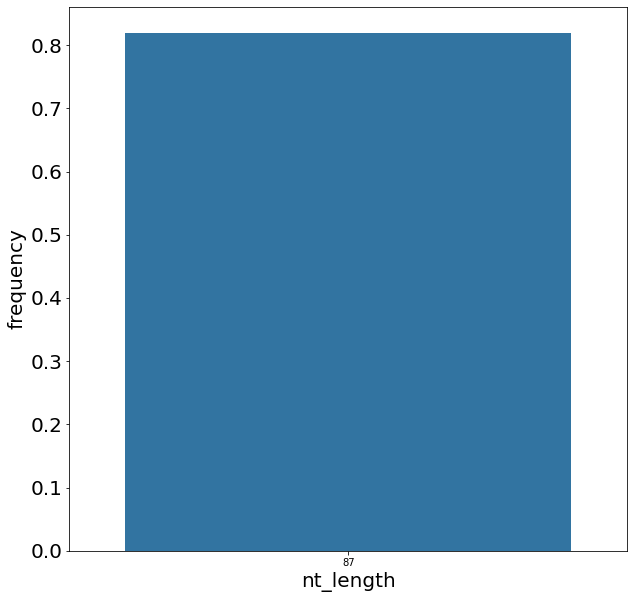

In [ ]:
ax = plt.subplots(figsize = (10,10))
ax = sns.barplot(data=df_sample,x='nt_length',y='spectratype')
ax.set_xlabel('nt_length',fontsize=20)
ax.set_ylabel('frequency',fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)

Basic analysis 7.1 Summary table for basic analysis

In [ ]:
#merge df_count and df_geomean_frequency first
df_geomean_frequency = df_geomean_frequency.merge(df_count, on='sample', how='left')

#create a dataframe that combines all the basic analysis (except for spectratype)
dfs = [df_diversity, df_mean_frequency, df_geomean_frequency, df_mean_cdr3nt_length, df_unique_CDR3_mean]

df_combined = pd.merge(dfs[0], dfs[1], left_on=['sample','hospitalization'], right_on=['sample','hospitalization'], how='outer')
for d in dfs[2:]:
    df_combined = pd.merge(df_combined, d, left_on=['sample','hospitalization'], right_on=['sample','hospitalization'], how='outer')

df_combined

,sample,hospitalization,clonotype_count,mean_frequency,geomean_frequency,reads_count,mean_cdr3nt_length,convergence
0,6232BW_TCRB,True,218977,0.000004,2.346555e-06,439782,71.044534,1.059416
1,5115BW_TCRB,True,218935,0.000004,1.465120e-06,657815,73.028812,1.056906
2,989003BW_TCRB,True,328930,0.000002,2.010251e-06,468659,70.830814,1.064478
3,7972BW_TCRB,True,173505,0.000005,3.560782e-06,255247,70.825511,1.048933
4,5386BW_TCRB,True,368429,0.000002,1.598191e-06,581196,70.545304,1.065433
5,2987BW_TCRB,True,302352,0.000003,1.785625e-06,519449,70.061195,1.066509
6,1568094BW_TCRB,True,291315,0.000003,2.114467e-06,443761,72.149922,1.059027
7,476909BW_TCRB,False,295809,0.000003,1.326791e-06,746763,67.645802,1.059928
8,234129BW_TCRB,False,334854,0.000002,1.622365e-06,542675,68.715633,1.070485
9,1566889BW_TCRB,False,380957,0.000002,1.752903e-06,593467,76.744388,1.077492


Basic analysis 7.2 - Statistical analysis of mean frequency

Basic analysis 7.2.1 - Test if the metric is normally distributed
1.   the null hypothesis here is normality
2.   if the p value is greater than 0.05, we cannot reject the null hypothesis (it is a normal distribution). If the p value is smaller than 0.05, we reject the null hypothesis (it is not a normal distribution)
3.   change 'clonotype_count' to other metrics that you are interested in



In [ ]:
x = stats.normaltest(df_combined['clonotype_count'])
x

NormaltestResult(statistic=0.7971806833771458, pvalue=0.6712656345816417)

Basic analysis 7.2.2 - Mean or median of diversity metrics among groups
1.   if the dataset is normally distributed, calculate mean
2.   if the dataset is not normally distributed, calculate median
3.   change 'clonotype_count' to other metrics that you are interested in


In [ ]:
#calculate the mean among two groups
df_metric_mean = df_combined.groupby('hospitalization')['clonotype_count'].mean().reset_index()
df_metric_mean

,hospitalization,clonotype_count
0,False,328980.125000
1,True,271777.571429


In [ ]:
#calculate the median among two groups
df_metric_median = df_combined.groupby('hospitalization')['clonotype_count'].median().reset_index()
df_metric_median

Basic analysis 7.2.3 - Stat test
1.   if the dataset is normally distributed, use t-test (stats.ttest_ind)
*   change the group1, group2 to the groups/samples that you are interested in
2.   if the dataset is not normally distributed, use Wilcoxon rank-sum test (stats.ranksums)
*   change the group1, group2 to the groups/samples that you are interested in
3.  change 'clonotype_count' to other metrics that you are interested in

In [ ]:
df1 = df_combined.copy()
df_group1 = df1[df1['hospitalization'] == True]
df_group2 = df1[df1['hospitalization'] == False]
stats.ttest_ind(df_group1['clonotype_count'], df_group2['clonotype_count'])

Ttest_indResult(statistic=-1.519104896430262, pvalue=0.13573143934391055)

Basic analysis 7.3.1 - Bar plot on metric per sample
1.   x-axis and y-axis labels, figsize, fontsize are customizable
2.   change 'clonotype_count' to other metrics that you are interested in

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.]),
 <a list of 7 Text major ticklabel objects>)

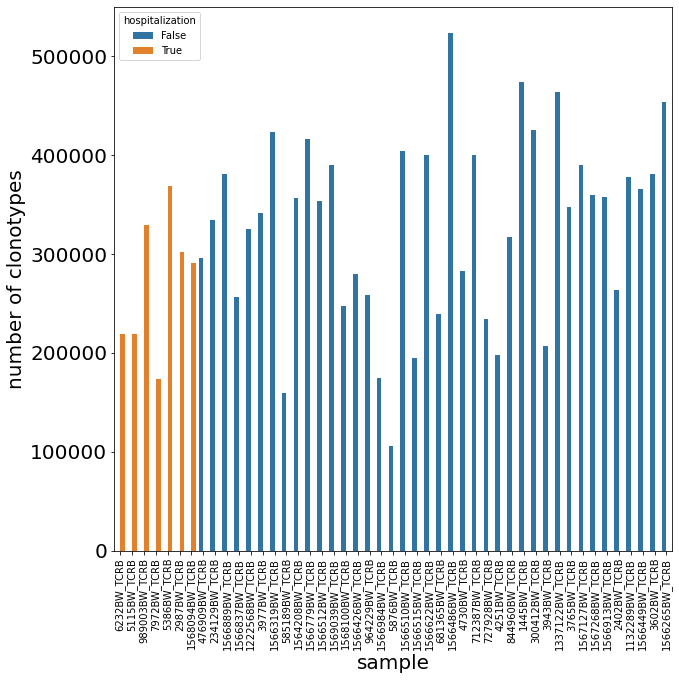

In [ ]:
ax = plt.subplots(figsize = (10,10))
ax = sns.barplot(data=df_combined,x='sample',y='clonotype_count',hue='hospitalization')
ax.set_xlabel('sample',fontsize=20)
ax.set_ylabel('number of clonotypes',fontsize=20)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=20)

Basic analysis 2.4 - Clonotype count violin plot per group
1.   x-axis and y-axis labels, figsize, fontsize are customizable  
2.   change the violin plot (sns.violinplot) to the plot type that you are interested in, includes strip plot (sns.stripplot), swarm plot (sns.swarmplot), box plot (sns.boxplot), boxen plot (sns.boxenplot), point plot (sns.pointplot), and bar plot (sns.barplot)
3.   change 'clonotype_count' to other metrics that you are interested in

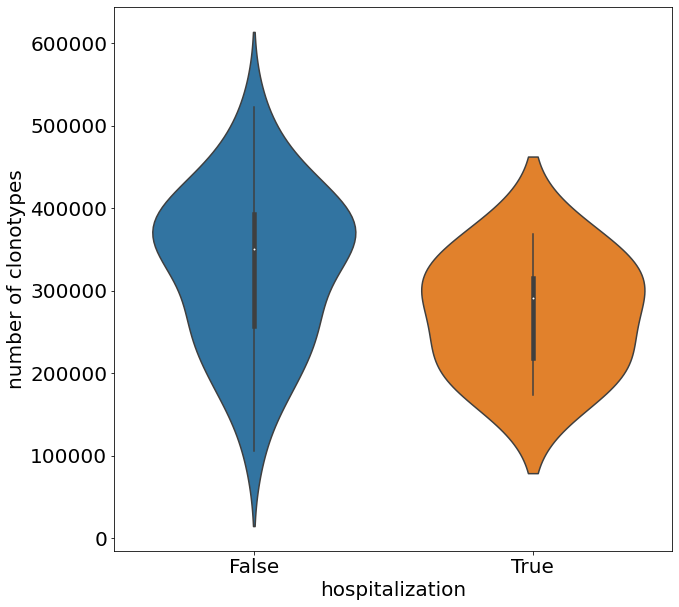

In [ ]:
ax = plt.subplots(figsize = (10,10))

ax = sns.violinplot(x='hospitalization',y='clonotype_count', data=df_combined)

ax.set_xlabel('hospitalization',fontsize=20)
ax.set_ylabel('number of clonotypes',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()